In [1]:
# Menginstall library googletrans pada versi 3.1.0a0
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 55.1/55.1 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 KB 3.0 MB/s eta 0:00:00
     -------------------------------------- 133.4/133.4 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 53.6/53.6 KB ? eta 0:00:00
     ---------------------------------------- 65.0/65.0 KB ? eta 0:00:00

You should consider upgrading via the 'c:\users\novendra.az\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=b0951d10cf1a3a06e9e6c57c2cb3c3dd4482dc7573679017678f1f59fc558357
  Stored in directory: c:\users\novendra.az\appdata\local\pip\cache\wheels\ae\e1\6c\5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3


**Input Data**

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Komentar Pengguna Kereta Api Lokal Daop 8.csv')
data

,Nama,Penilaian,Ulasan
0,Yudi Guntara,4.0,Mendingan ga terlalu tegak sandarannya
1,Ricard Staq,3.5,Karena jarak tpt duduk berhadapan terlalu deka...
2,Evy Yunanda K,3.5,"Mohon untuk toilet diperbaiki, baunya sangat t..."
3,Reky Prasetya,2.0,pas dapet yg ac rusak + penumpang penuh smpe b...
4,Dary Zha,4.0,"Saya naik sampe Blitar kaya, karena ac mati. h..."
...,...,...,...
1120,Ari Nugroho,3.0,"Jualan di depan stasiun makin banyak, tapi har..."
1121,Rina Cahyani,1.0,"lama sekali menunggu kereta ini datang, payah ..."
1122,Dedi Santoso,1.0,Pengembalian Penataran Dhoho pasti bikin senan...
1123,Dewi Sartika Husna,3.0,kesan yang diberikan kurang baik dan Gak masuk...


**Translate Komentar Kedalam Bahasa Inggris**

In [3]:
# Mengimport library googletrans
import googletrans

# Mengimport Translator dari library googletrans
from googletrans import Translator

# Mentranslate bahasa pada kolom ulasan ke bahasa inggris menggunakan Translator
translator = Translator()
translations = {}
for column in data.columns:
 unique_elements = data["Ulasan"].unique()
 for element in unique_elements:
  translations[element] = translator.translate(element).text
translations

{'Mendingan ga terlalu tegak sandarannya': 'Make sure the backrest is not too upright',
 'Karena jarak tpt duduk berhadapan terlalu dekat, maka saat penumpang penuh, maka terjadilah adu  dengkul': 'Because the seats facing each other are too close, when the passengers are full, knee-jerk fights occur',
 'Mohon untuk toilet diperbaiki, baunya sangat tidak sedap dan airnya kadang tidak keluar': "Please have the toilet repaired, the smell is very unpleasant and the water sometimes doesn't come out",
 'pas dapet yg ac rusak + penumpang penuh smpe berdiri, sungguh nostalgila rasanya ': 'When I got the broken AC + the passengers were all standing up, it was really nostalgic',
 'Saya naik sampe Blitar kaya, karena ac mati. habis turun dari kereta cari WC umum trus mandi. sebelum naek Kahuripan ': 'I rode all the way to Blitar, because the AC was dead. After getting off the train, look for a public toilet and take a shower. before climbing Kahuripan',
 'MasyaAllah kadang full banget sampai ger

**Install Vader Sentiment dan analisis sentimen dengan menghilangkan compound netral**

In [4]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Komentar Pengguna Kereta Api Lokal Daop 8.csv')

# Inisialisasi SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# Menggunakan Google Translate untuk menerjemahkan teks ke bahasa Inggris
translator = Translator()
data['Ulasan (Inggris)'] = data['Ulasan'].apply(lambda x: translator.translate(x, src='id', dest='en').text)

# Menghitung nilai compound pada seluruh data ulasan dalam bahasa Inggris
scores = [analyser.polarity_scores(x) for x in data['Ulasan (Inggris)']]
data['Compound'] = [x['compound'] for x in scores]

# Memberikan label pada data ulasan berdasarkan Compound
data['Sentiment'] = 'Positif'
data.loc[data['Compound'] < 0, 'Sentiment'] = 'Negatif'

# Menghilangkan komentar dengan nilai "Compound" 0
data = data[data['Compound'] != 0]

# Menampilkan 100 data pertama
data.head(100)

,Nama,Penilaian,Ulasan,Ulasan (Inggris),Compound,Sentiment
0,Yudi Guntara,4.0,Mendingan ga terlalu tegak sandarannya,It's better not to have the backrest too upright,0.4404,Positif
1,Ricard Staq,3.5,Karena jarak tpt duduk berhadapan terlalu deka...,Because the seats facing each other are too cl...,-0.4019,Negatif
2,Evy Yunanda K,3.5,"Mohon untuk toilet diperbaiki, baunya sangat t...","Please have the toilet repaired, the smell is ...",-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak + penumpang penuh smpe b...,When I got the broken AC + the passengers were...,-0.4767,Negatif
4,Dary Zha,4.0,"Saya naik sampe Blitar kaya, karena ac mati. h...","I rode all the way to Blitar, because the AC w...",-0.6486,Negatif
...,...,...,...,...,...,...
95,Dhian Septa A,2.0,Jendela rada burem,The window becomes blurry,-0.1027,Negatif
96,Andreas Santi Windarto,2.0,Lantai kotor dan ac kadang bocor,The floor is dirty and the AC sometimes leaks,-0.4404,Negatif
97,Gugun,3.0,ac dingin dan sejuk untuk kelas ekonomi,the air conditioner is cold and cool for econo...,0.3182,Positif
98,Sakti,4.0,sejauh yang saya rasakan selama perjalanan ma...,As far as I felt during my trip to Malang - Bl...,-0.3818,Negatif


**Menghapus Kolom Yang Tidak Diperlukan**

In [6]:
data_setelah_sentimen = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Keseluruhan.csv')
data_setelah_sentimen

,Nama,Penilaian,Ulasan,Ulasan (Inggris),Compound,Sentiment
0,Yudi Guntara,4.0,Mendingan ga terlalu tegak sandarannya,It's better not to have the backrest too upright,0.4404,Positif
1,Ricard Staq,3.5,Karena jarak tpt duduk berhadapan terlalu deka...,Because the seats facing each other are too cl...,-0.4019,Negatif
2,Evy Yunanda K,3.5,"Mohon untuk toilet diperbaiki, baunya sangat t...","Please have the toilet repaired, the smell is ...",-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak + penumpang penuh smpe b...,When I got the broken AC + the passengers were...,-0.4767,Negatif
4,Dary Zha,4.0,"Saya naik sampe Blitar kaya, karena ac mati. h...","I rode all the way to Blitar, because the AC w...",-0.6486,Negatif
...,...,...,...,...,...,...
1118,Ari Nugroho,3.0,"Jualan di depan stasiun makin banyak, tapi har...",There are more and more sales in front of the ...,0.7690,Positif
1119,Rina Cahyani,1.0,"lama sekali menunggu kereta ini datang, payah ...",It's been a long time waiting for this train t...,-0.5849,Negatif
1120,Dedi Santoso,1.0,Pengembalian Penataran Dhoho pasti bikin senan...,The return of Penataran Dhoho will definitely ...,0.7506,Positif
1121,Dewi Sartika Husna,3.0,kesan yang diberikan kurang baik dan Gak masuk...,The impression given is not good and it doesn'...,0.2008,Positif


In [7]:
data_setelah_sentimen.drop('Ulasan (Inggris)', axis=1, inplace=True)
data_setelah_sentimen

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,Mendingan ga terlalu tegak sandarannya,0.4404,Positif
1,Ricard Staq,3.5,Karena jarak tpt duduk berhadapan terlalu deka...,-0.4019,Negatif
2,Evy Yunanda K,3.5,"Mohon untuk toilet diperbaiki, baunya sangat t...",-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak + penumpang penuh smpe b...,-0.4767,Negatif
4,Dary Zha,4.0,"Saya naik sampe Blitar kaya, karena ac mati. h...",-0.6486,Negatif
...,...,...,...,...,...
1118,Ari Nugroho,3.0,"Jualan di depan stasiun makin banyak, tapi har...",0.7690,Positif
1119,Rina Cahyani,1.0,"lama sekali menunggu kereta ini datang, payah ...",-0.5849,Negatif
1120,Dedi Santoso,1.0,Pengembalian Penataran Dhoho pasti bikin senan...,0.7506,Positif
1121,Dewi Sartika Husna,3.0,kesan yang diberikan kurang baik dan Gak masuk...,0.2008,Positif


**Menghapus tanda baca**

In [8]:
import re
import string
import pandas as pd

# Fungsi untuk membersihkan teks
def preprocess_text(text):
    # Menghilangkan tanda baca
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Menghilangkan angka
    text = re.sub(r'\d', '', text)

    # Menghilangkan karakter kosong
    text = text.strip()

    return text

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Keseluruhan Penghapusan Komentar Inggris.csv')

# Mengaplikasikan fungsi preprocessing pada kolom tertentu, misalnya 'kolom_teks'
data['Ulasan'] = data['Ulasan'].apply(preprocess_text)

data.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,Mendingan ga terlalu tegak sandarannya,0.4404,Positif
1,Ricard Staq,3.5,Karena jarak tpt duduk berhadapan terlalu deka...,-0.4019,Negatif
2,Evy Yunanda K,3.5,Mohon untuk toilet diperbaiki baunya sangat ti...,-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak penumpang penuh smpe be...,-0.4767,Negatif
4,Dary Zha,4.0,Saya naik sampe Blitar kaya karena ac mati hab...,-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,Jendela rada burem,-0.1027,Negatif
96,Andreas Santi Windarto,2.0,Lantai kotor dan ac kadang bocor,-0.4404,Negatif
97,Gugun,3.0,ac dingin dan sejuk untuk kelas ekonomi,0.3182,Positif
98,Sakti,4.0,sejauh yang saya rasakan selama perjalanan ma...,-0.3818,Negatif


**Melakukan Case Folding**

In [9]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Penghapusan Tanda Baca.csv')

# Melakukan case folding pada kolom teks
data['Ulasan'] = data['Ulasan'].str.lower()

data.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,mendingan ga terlalu tegak sandarannya,0.4404,Positif
1,Ricard Staq,3.5,karena jarak tpt duduk berhadapan terlalu deka...,-0.4019,Negatif
2,Evy Yunanda K,3.5,mohon untuk toilet diperbaiki baunya sangat ti...,-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak penumpang penuh smpe be...,-0.4767,Negatif
4,Dary Zha,4.0,saya naik sampe blitar kaya karena ac mati hab...,-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,jendela rada burem,-0.1027,Negatif
96,Andreas Santi Windarto,2.0,lantai kotor dan ac kadang bocor,-0.4404,Negatif
97,Gugun,3.0,ac dingin dan sejuk untuk kelas ekonomi,0.3182,Positif
98,Sakti,4.0,sejauh yang saya rasakan selama perjalanan ma...,-0.3818,Negatif


**Melakukan Tokenizing**

In [10]:
!pip install nltk

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Case Folding.csv')

# Mendefinisikan fungsi untuk tokenisasi
def tokenize_text(text):
    # Menggunakan word_tokenize dari NLTK untuk tokenisasi
    tokens = word_tokenize(text)
    return tokens

# Melakukan tokenisasi pada kolom teks
data['Ulasan'] = data['Ulasan'].apply(tokenize_text)

data.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,"[mendingan, ga, terlalu, tegak, sandarannya]",0.4404,Positif
1,Ricard Staq,3.5,"[karena, jarak, tpt, duduk, berhadapan, terlal...",-0.4019,Negatif
2,Evy Yunanda K,3.5,"[mohon, untuk, toilet, diperbaiki, baunya, san...",-0.2716,Negatif
3,Reky Prasetya,2.0,"[pas, dapet, yg, ac, rusak, penumpang, penuh, ...",-0.4767,Negatif
4,Dary Zha,4.0,"[saya, naik, sampe, blitar, kaya, karena, ac, ...",-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,"[jendela, rada, burem]",-0.1027,Negatif
96,Andreas Santi Windarto,2.0,"[lantai, kotor, dan, ac, kadang, bocor]",-0.4404,Negatif
97,Gugun,3.0,"[ac, dingin, dan, sejuk, untuk, kelas, ekonomi]",0.3182,Positif
98,Sakti,4.0,"[sejauh, yang, saya, rasakan, selama, perjalan...",-0.3818,Negatif


**Melakukan stopword removal**

In [13]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [14]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Tokenisasi.csv')

# Mengimpor daftar stopwords bahasa Indonesia dari NLTK
stopwords_id = set(stopwords.words('indonesian'))

# Membuat objek StopWordRemover dari Sastrawi
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

# Fungsi untuk menghapus stopwords dari teks menggunakan Sastrawi
def remove_stopwords_sastrawi(text):
    return stopword_remover.remove(text)

# Fungsi untuk menghapus stopwords dari list kata
def stopwords_text(ulasan):
    ulasan = [word for word in ulasan if word not in stopwords_id]
    return ulasan

# Melakukan tokenisasi pada kolom teks
data['Ulasan'] = data['Ulasan'].apply(remove_stopwords_sastrawi)

# Konversi token menjadi list kata-kata
data['Ulasan'] = data['Ulasan'].apply(word_tokenize)

# Menghapus stopwords dari kolom teks
data['Ulasan'] = data['Ulasan'].apply(stopwords_text)

# Menggabungkan kata-kata kembali menjadi teks
data['Ulasan'] = data['Ulasan'].apply(lambda tokens: ' '.join(tokens))

data.head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,"[ mendingan , ga , , tegak , sandarannya ]",0.4404,Positif
1,Ricard Staq,3.5,"[ , jarak , tpt , duduk , berhadapan , , , , ,...",-0.4019,Negatif
2,Evy Yunanda K,3.5,"[ mohon , , toilet , diperbaiki , baunya , , ,...",-0.2716,Negatif
3,Reky Prasetya,2.0,"[ pas , dapet , yg , ac , rusak , penumpang , ...",-0.4767,Negatif
4,Dary Zha,4.0,"[ , , sampe , blitar , kaya , , ac , mati , ha...",-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,"[ jendela , rada , burem ]",-0.1027,Negatif
96,Andreas Santi Windarto,2.0,"[ lantai , kotor , , ac , kadang , bocor ]",-0.4404,Negatif
97,Gugun,3.0,"[ ac , dingin , , sejuk , , kelas , ekonomi ]",0.3182,Positif
98,Sakti,4.0,"[ , , , rasakan , , perjalanan , malang , blit...",-0.3818,Negatif


In [15]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Tokenisasi.csv')

# Mengimpor daftar stopwords bahasa Indonesia dari NLTK
stopwords_id = set(stopwords.words('indonesian'))

# Membuat objek StopWordRemover dari Sastrawi
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

# Fungsi untuk menghapus stopwords dari teks menggunakan Sastrawi
def remove_stopwords_sastrawi(text):
    return stopword_remover.remove(text)

# Fungsi untuk menghapus stopwords dari list kata
def stopwords_text(ulasan):
    ulasan = [word for word in ulasan if word not in stopwords_id and word != ',']
    return ulasan

# Melakukan tokenisasi pada kolom teks
data['Ulasan'] = data['Ulasan'].apply(remove_stopwords_sastrawi)

# Konversi token menjadi list kata-kata
data['Ulasan'] = data['Ulasan'].apply(word_tokenize)

# Menghapus stopwords dari kolom teks
data['Ulasan'] = data['Ulasan'].apply(stopwords_text)

# Menggabungkan kata-kata kembali menjadi teks
data['Ulasan'] = data['Ulasan'].apply(lambda tokens: ' '.join(tokens))

data.head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,[ mendingan ga tegak sandarannya ],0.4404,Positif
1,Ricard Staq,3.5,[ jarak tpt duduk berhadapan penumpang penuh a...,-0.4019,Negatif
2,Evy Yunanda K,3.5,[ mohon toilet diperbaiki baunya sedap airnya ...,-0.2716,Negatif
3,Reky Prasetya,2.0,[ pas dapet yg ac rusak penumpang penuh smpe b...,-0.4767,Negatif
4,Dary Zha,4.0,[ sampe blitar kaya ac mati habis turun kereta...,-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,[ jendela rada burem ],-0.1027,Negatif
96,Andreas Santi Windarto,2.0,[ lantai kotor ac kadang bocor ],-0.4404,Negatif
97,Gugun,3.0,[ ac dingin sejuk kelas ekonomi ],0.3182,Positif
98,Sakti,4.0,[ rasakan perjalanan malang blitar minim gunca...,-0.3818,Negatif


In [16]:
stopwordremoval = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Stopword Removal.csv')
stopwordremoval

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,"[mendingan, ga, tegak, sandarannya]",0.4404,Positif
1,Ricard Staq,3.5,"[jarak, tpt, duduk, berhadapan, penumpang, pen...",-0.4019,Negatif
2,Evy Yunanda K,3.5,"[mohon, toilet, diperbaiki, baunya, sedap, air...",-0.2716,Negatif
3,Reky Prasetya,2.0,"[pas, dapet, yg, ac, rusak, penumpang, penuh, ...",-0.4767,Negatif
4,Dary Zha,4.0,"[sampe, blitar, kaya, ac, mati, habis, turun, ...",-0.6486,Negatif
...,...,...,...,...,...
1118,Ari Nugroho,3.0,"[jualan, stasiun, bersihkan, gak, kumuh]",0.7690,Positif
1119,Rina Cahyani,1.0,"[menunggu, kereta, payah]",-0.5849,Negatif
1120,Dedi Santoso,1.0,"[pengembalian, penataran, dhoho, bikin, senang...",0.7506,Positif
1121,Dewi Sartika Husna,3.0,"[kesan, gak, masuk, akal, penumpukan, kereta, ...",0.2008,Positif


**Stemming**

In [17]:
# Mengimport StemmerFactory dan StopWordRemoverFactory dari library Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

# Membaca data dari file CSV
input_file = '/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Sentimen Stopword Removal.csv'  # Ganti dengan nama file CSV yang sesuai
data = pd.read_csv(input_file)

# Membuat objek StopWordRemover
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Membuat objek Stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Fungsi untuk menghapus stop words dan melakukan stemming
def preprocess_text(ulasan):
    ulasan = stopword_remover.remove(ulasan)
    ulasan = stemmer.stem(ulasan)
    return ulasan

# Melakukan preprocessing pada kolom 'Ulasan'
data['Ulasan'] = data['Ulasan'].apply(preprocess_text)

# # Menyimpan hasil preprocessing kembali ke file CSV
# data.to_csv('Hasil Analisis Stemming Tambahan.csv', index=False)

data.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,mending ga tegak sandar,0.4404,Positif
1,Ricard Staq,3.5,jarak tpt duduk hadap tumpang penuh adu dengkul,-0.4019,Negatif
2,Evy Yunanda K,3.5,mohon toilet baik bau sedap air kadang,-0.2716,Negatif
3,Reky Prasetya,2.0,pas dapet yg ac rusak tumpang penuh smpe diri ...,-0.4767,Negatif
4,Dary Zha,4.0,sampe blitar kaya ac mati habis turun kereta c...,-0.6486,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,jendela rada burem,-0.1027,Negatif
96,Andreas Santi Windarto,2.0,lantai kotor ac kadang bocor,-0.4404,Negatif
97,Gugun,3.0,ac dingin sejuk kelas ekonomi,0.3182,Positif
98,Sakti,4.0,rasa jalan malang blitar minim guncang,-0.3818,Negatif


In [18]:
import pandas as pd

# Baca file CSV untuk membuat library singkatan
library_path = '/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Library Kata Indonesia.csv'  # Ganti dengan path sesuai dengan lokasi file library singkatan Anda
library_df = pd.read_csv(library_path)
library_singkatan = dict(zip(library_df['non-baku'].str.lower(), library_df['formal']))

# Baca file CSV utama
file_csv_path = '/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Hasil Analisis Perbaikan.csv'  # Ganti dengan path sesuai dengan lokasi file CSV utama Anda
df = pd.read_csv(file_csv_path)

# Fungsi untuk mengganti kata singkatan
def ganti_singkatan(teks):
    kata_kunci = teks.lower()
    return library_singkatan.get(kata_kunci, teks)

# Terapkan fungsi ganti_singkatan pada kolom Ulasan
df['Ulasan'] = df['Ulasan'].apply(lambda x: ' '.join(ganti_singkatan(kata) for kata in x.split()))

# Simpan DataFrame yang telah dimodifikasi ke file CSV baru
# output_csv_path = 'Hasil Analisis Stemming Tambahan.csv'  # Ganti dengan path sesuai dengan keinginan Anda
# df.to_csv(output_csv_path, index=False)
df.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,lebih baik tidak tegak sandar,0.4404,Positif
1,Ricard Staq,3.5,jarak tempat duduk hadap penumpang penuh adu d...,-0.4019,Negatif
2,Evy Yunanda K,3.5,mohon toilet baik bau sedap air kadang,-0.2716,Negatif
3,Reky Prasetya,2.0,saat dapat yang ac rusak penumpang penuh sampa...,-0.4767,Negatif
4,Dary Zha,4.0,sampai blitar seperti ac minat habis turun ker...,0.3612,Negatif
...,...,...,...,...,...
95,Dhian Septa A,2.0,jendela agak buram,-0.1027,Negatif
96,Andreas Santi Windarto,2.0,lantai kotor ac kadang bocor,-0.4404,Negatif
97,Gugun,3.0,ac dingin sejuk kelas ekonomi,0.3182,Positif
98,Sakti,4.0,rasa jalan malang blitar minim guncang,-0.3818,Negatif


In [19]:
datasetstopword = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Analisis Sentimen Stemming New.csv')
datasetstopword

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,"[lebih, baik, tidaktegak, sandar]",0.4404,Positif
1,Ricard Staq,3.5,"[jarak, tempat, duduk, hadap, penumpang, penuh...",-0.4019,Negatif
2,Evy Yunanda K,3.5,"[toilet, baik, bau, sedap, air, kadang]",-0.2716,Negatif
3,Reky Prasetya,2.0,"[saat, dapat, ac, rusak, penumpang, penuh, sam...",-0.4767,Negatif
4,Dary Zha,4.0,"[sampai, blitar, seperti, ac, minat, habis, tu...",0.3612,Negatif
...,...,...,...,...,...
1118,Ari Nugroho,3.0,"[jual, stasiun, ramai, sih, tidakkumuh]",0.7690,Positif
1119,Rina Cahyani,1.0,"[tunggu, kereta, payah, lama]",-0.5849,Negatif
1120,Dedi Santoso,1.0,"[kembali, penataran, dhoho, bikin, senang, orang]",0.7506,Positif
1121,Dewi Sartika Husna,3.0,"[kesan, masuk, akal, tumpuk, kereta, commuter,...",0.2008,Positif


**Label Encoder untuk kolom sentiment**

In [20]:
import pandas as pd

# Import data
dfsentiment = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/Analisis Sentimen Stemming New.csv')

# Definisikan fungsi untuk mengubah kategori
def ubah_kategori(sentiment):
    if sentiment == "Positif":
        return 1
    return 0

# Terapkan fungsi pada kolom sentiment
dfsentiment["Sentiment"] = dfsentiment["Sentiment"].apply(ubah_kategori)

# Cetak dataframe
dfsentiment.head(100)

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,"[lebih, baik, tidaktegak, sandar]",0.4404,1
1,Ricard Staq,3.5,"[jarak, tempat, duduk, hadap, penumpang, penuh...",-0.4019,0
2,Evy Yunanda K,3.5,"[toilet, baik, bau, sedap, air, kadang]",-0.2716,0
3,Reky Prasetya,2.0,"[saat, dapat, ac, rusak, penumpang, penuh, sam...",-0.4767,0
4,Dary Zha,4.0,"[sampai, blitar, seperti, ac, minat, habis, tu...",0.3612,0
...,...,...,...,...,...
95,Dhian Septa A,2.0,"[jendela, agak, buram]",-0.1027,0
96,Andreas Santi Windarto,2.0,"[lantai, kotor, ac, kadang, bocor]",-0.4404,0
97,Gugun,3.0,"[ac, dingin, sejuk, kelas, ekonomi]",0.3182,1
98,Sakti,4.0,"[rasa, jalan, malang, blitar, minim, guncang]",-0.3818,0


**Melihat distribusi data dan Wordcloud**

In [21]:
KelasPositif = dfsentiment[dfsentiment['Sentiment']==1].count()
KelasNegatif = dfsentiment[dfsentiment['Sentiment']==0].count()
print('-'*54)
print('Hasil Distribusi Data')
print('-'*54)
print('kelas positif: ', KelasPositif.values[2],' Komentar')
print('kelas negatif: ', KelasNegatif.values[2],' Komentar')
print('total dataset: ', dfsentiment.shape[0],' komentar')
print('-'*54)

------------------------------------------------------
Hasil Distribusi Data
------------------------------------------------------
kelas positif:  778  Komentar
kelas negatif:  345  Komentar
total dataset:  1123  komentar
------------------------------------------------------


In [22]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

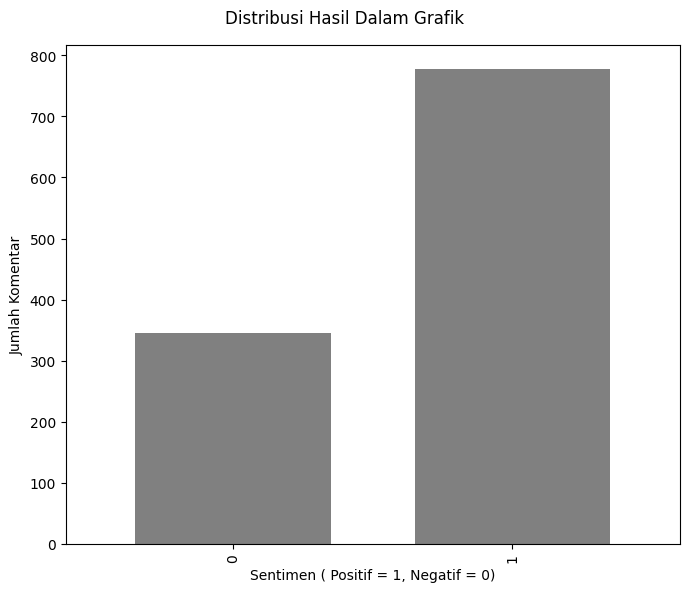

In [23]:
ax1 = plt.subplots(figsize=(7,6))
HistogramRating = dfsentiment['Sentiment'].value_counts().sort_index()
HistogramRating.plot(kind='bar', width=0.7, color='gray')
plt.xlabel('Sentimen ( Positif = 1, Negatif = 0)')
plt.ylabel('Jumlah Komentar')
plt.suptitle("Distribusi Hasil Dalam Grafik")
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from wordcloud import WordCloud

In [25]:
df_positif = dfsentiment[dfsentiment["Sentiment"] == 1]
df_negatif = dfsentiment[dfsentiment["Sentiment"] == 0]

In [26]:
# Buat wordcloud untuk ulasan positif
kata_positif = df_positif["Ulasan"].sum()
wordcloud_positif = WordCloud().generate(kata_positif)

# Buat wordcloud untuk ulasan negatif
kata_negatif = df_negatif["Ulasan"].sum()
wordcloud_negatif = WordCloud().generate(kata_negatif)

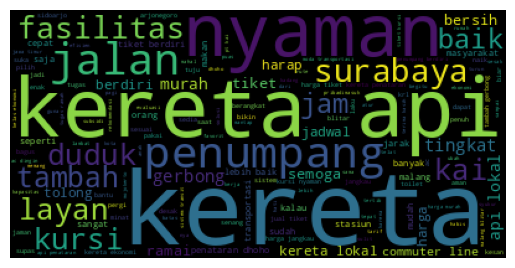

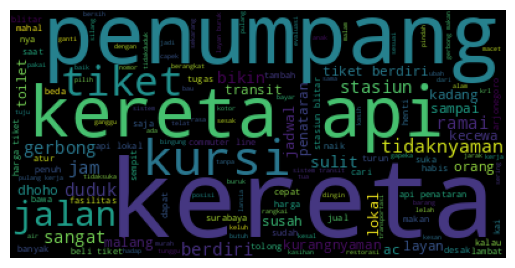

In [27]:
# Tampilkan wordcloud untuk ulasan positif
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

# Tampilkan wordcloud untuk ulasan negatif
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

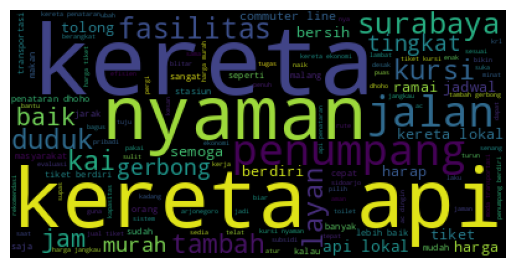

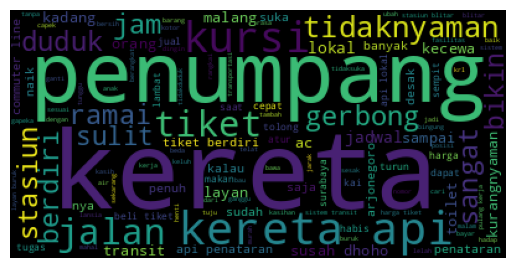

In [28]:
import pandas as pd
from wordcloud import WordCloud
import re

df_positif = dfsentiment[dfsentiment["Sentiment"] == 1]
df_negatif = dfsentiment[dfsentiment["Sentiment"] == 0]

# Buat wordcloud untuk ulasan positif
kata_positif = df_positif["Ulasan"].sum()
kata_positif = re.split(r"\W+tidak\W+", kata_positif)
kata_positif = ['tidak' + kata for kata in kata_positif]
wordcloud_positif = WordCloud().generate(" ".join(kata_positif))

# Buat wordcloud untuk ulasan negatif
kata_negatif = df_negatif["Ulasan"].sum()
kata_negatif = re.split(r"\W+tidak\W+", kata_negatif)
kata_negatif = ['tidak' + kata for kata in kata_negatif]
wordcloud_negatif = WordCloud().generate(" ".join(kata_negatif))

# Tampilkan wordcloud untuk ulasan positif
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

# Tampilkan wordcloud untuk ulasan negatif
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

**Pembobotan data TF - IDF**

In [29]:
datatfidf = pd.read_csv('/content/drive/MyDrive/Seminar Proposal/Skripsi/Dataset/persiapan tfidf new.csv')
datatfidf

,Nama,Penilaian,Ulasan,Compound,Sentiment
0,Yudi Guntara,4.0,lebih baik tidak tegak sandar,0.4404,Positif
1,Ricard Staq,3.5,jarak tempat duduk hadap penumpang penuh adu d...,-0.4019,Negatif
2,Evy Yunanda K,3.5,toilet baik bau sedap air kadang,-0.2716,Negatif
3,Reky Prasetya,2.0,saat dapat ac rusak penumpang penuh sampai ber...,-0.4767,Negatif
4,Dary Zha,4.0,sampai blitar seperti ac minat habis turun ker...,0.3612,Negatif
...,...,...,...,...,...
1118,Ari Nugroho,3.0,jual stasiun ramai sih tidak kumuh,0.7690,Positif
1119,Rina Cahyani,1.0,tunggu kereta payah lama,-0.5849,Negatif
1120,Dedi Santoso,1.0,kembali penataran dhoho bikin senang orang,0.7506,Positif
1121,Dewi Sartika Husna,3.0,kesan masuk akal tumpuk kereta commuter line a...,0.2008,Positif


In [30]:
# Mengimport CountVectorizer dan TfidfVectorizer dari library sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Proses TF-IDF
data_clean = datatfidf
data_clean = data_clean.astype({'Sentiment' : 'category'})
data_clean = data_clean.astype({'Ulasan' : 'string'})

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Ulasan'].astype('U'))
tokens_tf = tf.get_feature_names_out()
datatfidf1 = pd.DataFrame(data = text_tf.toarray(), columns = tokens_tf)

datatfidf1.to_csv('Hasil Pembobotan TF-IDF.csv', index=False)
datatfidf1.head(100)

,ac,acces,acuan,acuh,acung,ada,adem,adik,adil,adu,...,waspada,wc,wifi,wilayah,wisata,wkwk,wlingi,wonokromo,ya,zaman
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450872,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.239981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.208395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.344359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.319058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.357792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizerTfIdf = TfidfVectorizer()
InputKata = datatfidf['Ulasan'].fillna('')
xTfIdf = vectorizerTfIdf.fit_transform(InputKata)
LabelKelas=np.array(datatfidf['Sentiment'])

In [32]:
LabelKelas

array(['Positif', 'Negatif', 'Negatif', ..., 'Positif', 'Positif',
       'Positif'], dtype=object)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Misalkan dfsentiment adalah DataFrame yang berisi seluruh data Anda
# dfsentiment harus memiliki kolom 'Ulasan' sebagai fitur dan 'Sentiment' sebagai label

# Memisahkan data menjadi fitur (X) dan label (y)
X = dfsentiment['Ulasan'].fillna('')
y = dfsentiment['Sentiment']

# Inisialisasi model Naive Bayes
BayesType = MultinomialNB()

# Proses TF-IDF pada seluruh data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Melatih model dengan seluruh data
BayesType.fit(X_tfidf, y)

# Input kalimat dari pengguna
kalimat_input = input("Masukkan kalimat yang ingin diprediksi sentimennya: ")

# Proses TF-IDF pada kalimat yang akan diprediksi
kalimat_tfidf = tfidf_vectorizer.transform([kalimat_input])

# Melakukan prediksi sentimen
hasil_prediksi = BayesType.predict(kalimat_tfidf)

# Menampilkan hasil prediksi
sentimen = "Positif" if hasil_prediksi[0] == 1 else "Negatif"
print(f"Kalimat: {kalimat_input} - Prediksi Sentimen: {sentimen}")

Masukkan kalimat yang ingin diprediksi sentimennya: pelayanan bagus
Kalimat: pelayanan bagus - Prediksi Sentimen: Positif


In [42]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Misalkan dfsentiment adalah DataFrame yang berisi seluruh data Anda
# dfsentiment harus memiliki kolom 'Ulasan' sebagai fitur dan 'Sentiment' sebagai label

# Memisahkan data menjadi fitur (X) dan label (y)
X = dfsentiment['Ulasan'].fillna('')
y = dfsentiment['Sentiment']

# Inisialisasi model Naive Bayes
BayesType = MultinomialNB()

# Proses TF-IDF pada seluruh data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Melatih model dengan seluruh data
BayesType.fit(X_tfidf, y)

# Simpan model menggunakan joblib
joblib.dump(BayesType, "multinomial_naive_bayes_model.pkl")

# Simpan vectorizer menggunakan joblib
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

**Penentuan jumlah PC**

In [34]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Menghitung nilai Variance dan Covariance Matrix
# scaler = StandardScaler()
# xTfIdf_scaled = scaler.fit_transform(xTfIdf.toarray())
# covariance_matrix = np.cov(xTfIdf_scaled, rowvar=False)

# # Menghitung nilai Eigen Value dan Eigen Vector
# eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

# # Mengurutkan nilai Eigen Value secara Descending dan Index Vektor Eigen
# sorted_index = np.argsort(eigen_values)[::-1]
# sorted_eigenvalues = eigen_values[sorted_index]
# sorted_eigenvectors = eigen_vectors[:, sorted_index]

# # Perhitungan Principal Component Analysis
# total_variance = np.sum(sorted_eigenvalues)
# explained_variance_ratio = sorted_eigenvalues / total_variance
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# # Menentukan jumlah komponen yang akan dipilih
# # Misalnya, kita pilih 95% dari total variance
# desired_explained_variance = 0.50
# num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

# # Mengambil sejumlah komponen yang telah ditentukan
# selected_components = sorted_eigenvectors[:, :num_components]

# # Menyeleksi Fitur yang akan diklasifikasi
# x_selected = np.dot(xTfIdf_scaled, selected_components)

# # Menampilkan informasi
# print(f"Jumlah komponen yang dipilih: {num_components}")
# print(f"Total variance yang dijelaskan: {cumulative_explained_variance[num_components-1]*100:.2f}%")

# # Menyimpan data hasil seleksi fitur ke dalam DataFrame
# selected_features = pd.DataFrame(data=x_selected, columns=[f'PC{i}' for i in range(1, num_components + 1)])
# selected_features['Sentiment'] = LabelKelas

# # Menyimpan hasil seleksi fitur ke dalam file CSV
# selected_features.to_csv('Hasil Seleksi Fitur.csv', index=False)

# # Menampilkan beberapa baris pertama dari hasil seleksi fitur
# selected_features.head()

**Pembagian data eksperimen menggunakan K-Fold Cross Validation**

In [35]:
# from sklearn.model_selection import train_test_split

# # Data TF-IDF dan label kelas
# X = x_selected
# y = LabelKelas

# # Pembagian data menjadi training set (80%) dan testing set (20%)
# ValX_train, ValX_test, Valy_train, Valy_test = train_test_split(X, y, test_size=0.2, random_state=8)

**Pembentukan convusion matrix**

In [36]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix

# # Membagi data menggunakan train_test_split
# ValX_train, ValX_test, Valy_train, Valy_test = train_test_split(x_selected, LabelKelas, test_size=0.2, shuffle=True, random_state=8)

# # Membuat model Naive Bayes
# BayesType = GaussianNB()

# # Melatih model menggunakan ValX_train dan Valy_train
# BayesType.fit(ValX_train, Valy_train)

# # Melakukan prediksi menggunakan ValX_test
# y_pred = BayesType.predict(ValX_test)

# # Menghitung confusion matrix
# confusion = confusion_matrix(Valy_test, y_pred)
# print("Confusion Matrix:")
# print(confusion)

# # Menghitung nilai True Positive (tp), True Negative (tn), False Negative (fn), dan False Positive (fp)
# tp = confusion[0, 0]
# tn = confusion[1, 1]
# fn = confusion[0, 1]
# fp = confusion[1, 0]

# # Menghitung total data di confusion matrix
# TotalTest = tp + tn + fn + fp
# print(f"True Positive (TP): {tp}")
# print(f"True Negative (TN): {tn}")
# print(f"False Negative (FN): {fn}")
# print(f"False Positive (FP): {fp}")
# print(f"Total Test Data: {TotalTest}")

In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Fungsi untuk menampilkan confusion matrix dalam bentuk visual
# def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
#     plt.figure(figsize=(8, 6))
#     sns.set(style='whitegrid', font_scale=1.2)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(title)
#     plt.show()

# # Contoh confusion matrix berdasarkan hasil prediksi dan nilai sebenarnya
# # (Ganti Valy_test dengan LabelKelas yang sesuai jika perlu)
# confusion_matrix_data = confusion_matrix(Valy_test, y_pred)

# # Definisikan kelas atau label yang akan digunakan
# class_names = ['Negatif', 'Positif']  # Ganti dengan label yang sesuai dengan kasus Anda

# # Tampilkan confusion matrix menggunakan fungsi plot_confusion_matrix
# plot_confusion_matrix(confusion_matrix_data, classes=class_names, title='Confusion Matrix')

**Pengujian Multinomial Naive Bayes**

In [38]:
# from sklearn.model_selection import train_test_split

# # Memisahkan data menjadi fitur (X) dan label (y)
# X = datatfidf['Ulasan'].fillna('')
# y = datatfidf['Sentiment']

# # Membagi data menjadi data latih (80%) dan data uji (20%)
# DataXTrain, ValX_test, DataYTrain, Valy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Menampilkan jumlah data latih dan data uji
# print(f"Jumlah Data Latih: {len(DataXTrain)}")
# print(f"Jumlah Data Uji: {len(ValX_test)}")

In [39]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Misalkan dfsentiment adalah DataFrame yang berisi seluruh data Anda
# # dfsentiment harus memiliki kolom 'Ulasan' sebagai fitur dan 'Sentiment' sebagai label

# # Memisahkan data menjadi fitur (X) dan label (y)
# X = datatfidf['Ulasan'].fillna('')
# y = datatfidf['Sentiment']

# # Membagi data menjadi data latih (80%) dan data uji (20%)
# DataXTrain, ValX_test, DataYTrain, Valy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Proses TF-IDF pada data latih
# tfidf_vectorizer = TfidfVectorizer()
# XTrain_tfidf = tfidf_vectorizer.fit_transform(DataXTrain)

# # Proses TF-IDF pada data uji
# ValX_test_tfidf = tfidf_vectorizer.transform(ValX_test)

# # Inisialisasi model Naive Bayes
# BayesType = MultinomialNB()

# # Melakukan klasifikasi
# y_pred = BayesType.fit(XTrain_tfidf, DataYTrain).predict(ValX_test_tfidf)

# # Menghitung confusion matrix
# confusion = confusion_matrix(Valy_test, y_pred)
# print("Confusion Matrix:")
# print(confusion)

# # Menampilkan classification report
# accuracy = classification_report(Valy_test, y_pred, zero_division=1)
# print("Classification Report:")
# print(accuracy)

# # Menghitung nilai TP, TN, FP, FN
# tp = confusion[0, 0]
# tn = confusion[1, 1]
# fn = confusion[0, 1]
# fp = confusion[1, 0]

# # Menghitung performansi
# TotalTest = tp + tn + fn + fp
# precision = precision_score(Valy_test, y_pred, average='weighted')
# recall = recall_score(Valy_test, y_pred, average='weighted')
# f1 = f1_score(Valy_test, y_pred, average='weighted')
# accuracy = accuracy_score(Valy_test, y_pred)

# # Menyusun data hasil pengujian
# HasilVal = [[tp, tn, fn, fp, TotalTest, precision, recall, f1, accuracy]]
# columns = ['TP', 'TN', 'FN', 'FP', 'Total Test', 'Precision', 'Recall', 'F1Score', 'Accuracy']
# hasil_pengujian = pd.DataFrame(HasilVal, columns=columns)

# # Menampilkan hasil pengujian
# print("Hasil Pengujian:")
# print(hasil_pengujian)

**Validasi Multinomial Naive bayes (10 K-Fold Cross Validation)**

In [40]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.model_selection import KFold
# from imblearn.over_sampling import RandomOverSampler
# import pandas as pd
# import numpy as np

# # Misalkan dfsentiment adalah DataFrame yang berisi seluruh data Anda
# # dfsentiment harus memiliki kolom 'Ulasan' sebagai fitur dan 'Sentiment' sebagai label

# # Memisahkan data menjadi fitur (X) dan label (y)
# X = datatfidf['Ulasan'].fillna('')
# y = datatfidf['Sentiment']

# # Inisialisasi model Naive Bayes
# BayesType = MultinomialNB()

# # Inisialisasi K-Fold Cross Validation dengan k=10
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Inisialisasi variabel untuk menyimpan hasil pengujian
# hasil_pengujian = []

# # Iterasi melalui K-Fold Cross Validation
# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     # Membagi data menjadi data latih dan data validasi
#     X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[test_index]

#     # Mengatasi ketidakseimbangan kelas dengan oversampling
#     oversampler = RandomOverSampler(random_state=42)
#     X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.to_frame(), y_train)

#     # Proses TF-IDF pada data latih
#     tfidf_vectorizer = TfidfVectorizer()
#     X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_resampled['Ulasan'])

#     # Proses TF-IDF pada data validasi
#     X_val_tfidf = tfidf_vectorizer.transform(X_val)

#     # Melatih model
#     BayesType.fit(X_train_tfidf, y_train_resampled)

#     # Melakukan prediksi
#     y_pred = BayesType.predict(X_val_tfidf)

#     # Menghitung confusion matrix
#     confusion = confusion_matrix(y_val, y_pred)

#     # Menghitung nilai TP, TN, FP, FN
#     tp = confusion[0, 0]
#     tn = confusion[1, 1]
#     fn = confusion[0, 1]
#     fp = confusion[1, 0]

#     # Menghitung performansi
#     total_test = tp + tn + fn + fp
#     precision = np.round(tp / (tp + fp), 2) if (tp + fp) > 0 else 0
#     recall = np.round(tp / (tp + fn), 2) if (tp + fn) > 0 else 0
#     f1 = np.round(2 * (precision * recall) / (precision + recall), 2) if (precision + recall) > 0 else 0
#     accuracy = np.round((tp + tn) / total_test, 2) if total_test > 0 else 0

#     # Menyusun data hasil pengujian
#     hasil_pengujian.append({
#         'Fold': i + 1,
#         'TP': tp,
#         'TN': tn,
#         'FN': fn,
#         'FP': fp,
#         'Total Test': total_test,
#         'Precision': precision,
#         'Recall': recall,
#         'F1Score': f1,
#         'Accuracy': accuracy
#     })

#     # Menampilkan hasil pengujian untuk setiap fold
#     print(f"\nFold {i + 1} - Hasil Pengujian:")
#     print("Confusion Matrix:")
#     print(confusion)
#     print(f"TP: {tp}, TN: {tn}, FN: {fn}, FP: {fp}")
#     print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}")

# # Menampilkan rata-rata hasil pengujian
# hasil_rata_rata = pd.DataFrame(hasil_pengujian).mean()
# print("\nRata-rata Hasil Pengujian:")
# print(hasil_rata_rata)

In [41]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB

# # Misalkan dfsentiment adalah DataFrame yang berisi seluruh data Anda
# # dfsentiment harus memiliki kolom 'Ulasan' sebagai fitur dan 'Sentiment' sebagai label

# # Memisahkan data menjadi fitur (X) dan label (y)
# X = dfsentiment['Ulasan'].fillna('')
# y = dfsentiment['Sentiment']

# # Inisialisasi model Naive Bayes
# BayesType = MultinomialNB()

# # Proses TF-IDF pada seluruh data
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf = tfidf_vectorizer.fit_transform(X)

# # Melatih model dengan seluruh data
# BayesType.fit(X_tfidf, y)

# # Input kalimat dari pengguna
# kalimat_input = input("Masukkan kalimat yang ingin diprediksi sentimennya: ")

# # Proses TF-IDF pada kalimat yang akan diprediksi
# kalimat_tfidf = tfidf_vectorizer.transform([kalimat_input])

# # Melakukan prediksi sentimen
# hasil_prediksi = BayesType.predict(kalimat_tfidf)

# # Menampilkan hasil prediksi
# sentimen = "Positif" if hasil_prediksi[0] == 1 else "Negatif"
# print(f"Kalimat: {kalimat_input} - Prediksi Sentimen: {sentimen}")